# Al Rahma Dinda S/3323600038/3-D4 Sains Data Terapan B

## Analisis Faktor yang Memengaruhi Tingkat Pengangguran Terbuka (TPT) di Jawa Timur Tahun 2023 dengan Model Regresi Probit

### Library

In [166]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Dataset

Menampilkan isi dataset

In [167]:
df = pd.read_excel("../Studi Kasus/Dataset/Dataset TPT Jatim 2023.xlsx")
df

,Kabupaten/Kota,TPT,TPAK,IPM,UMK
0,Pacitan,1.83,81.64,70.19,2157270.25
1,Ponorogo,4.66,75.88,72.50,2149709.45
2,Trenggalek,4.52,80.72,71.73,2139426.01
3,Tulungagung,5.65,74.70,74.61,2229358.67
4,Blitar,4.91,73.50,72.49,2215071.18
5,Kediri,5.79,68.74,73.96,2243422.93
6,Malang,5.70,70.66,72.16,3268275.36
7,Lumajang,3.67,68.49,67.87,2200607.20
8,Jember,4.01,72.30,68.64,2555662.91
9,Banyuwangi,4.75,79.04,72.61,2528899.12


Analisis Deskriptif

In [168]:
df.describe()

,TPT,TPAK,IPM,UMK
count,38.000000,38.000000,38.000000,3.800000e+01
mean,4.662895,73.159211,73.680263,2.694768e+06
std,1.428828,3.767150,5.053755,7.891471e+05
min,1.710000,66.890000,64.130000,2.114335e+06
25%,4.082500,70.242500,70.215000,2.157664e+06
50%,4.665000,72.495000,72.790000,2.261496e+06
75%,5.600000,75.230000,76.760000,2.828888e+06
max,8.050000,81.640000,83.450000,4.525479e+06


Mengecek tipe data

In [169]:
df.dtypes

Kabupaten/Kota     object
TPT               float64
TPAK              float64
IPM               float64
UMK               float64
dtype: object

### Visualisasi Distribusi Variabel

Menampilkan distribusi variabel utama (TPT, TPAK, IPM, UMK)

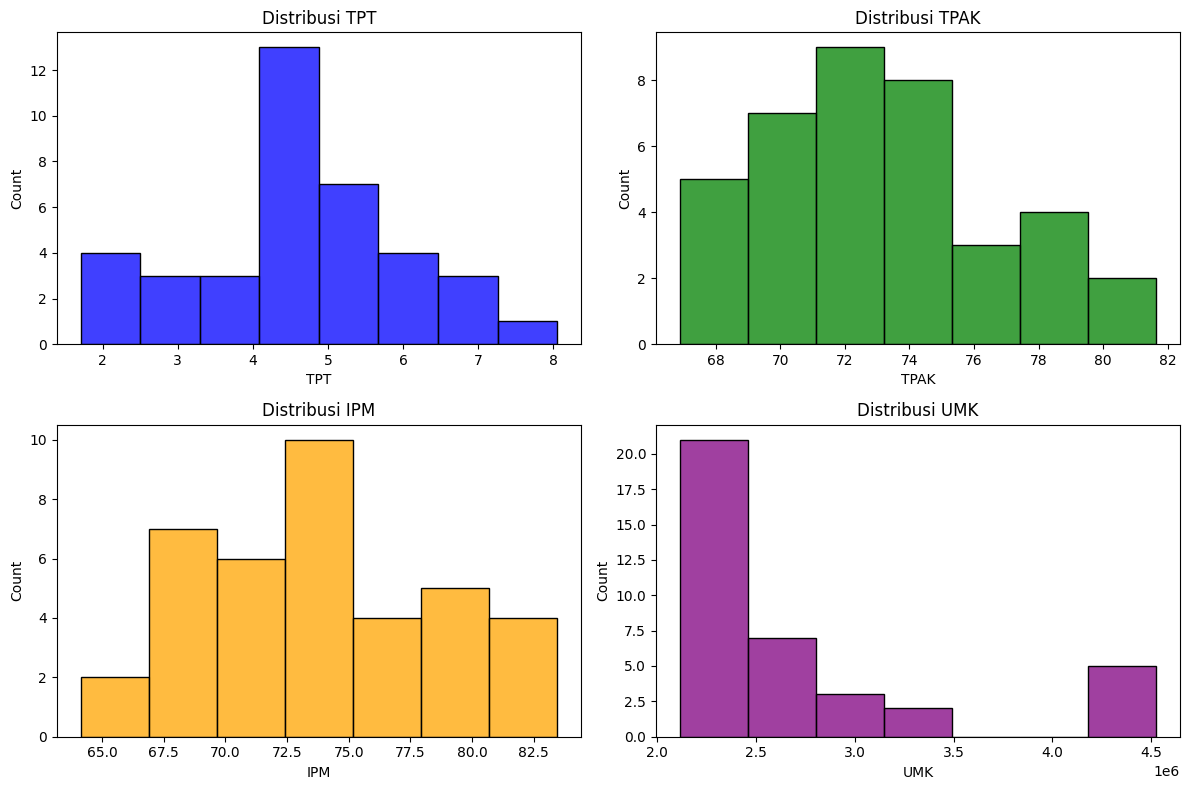

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(df['TPT'], ax=axes[0,0], color="blue"); axes[0,0].set_title("Distribusi TPT")
sns.histplot(df['TPAK'], ax=axes[0,1], color="green"); axes[0,1].set_title("Distribusi TPAK")
sns.histplot(df['IPM'], ax=axes[1,0], color="orange"); axes[1,0].set_title("Distribusi IPM")
sns.histplot(df['UMK'], ax=axes[1,1], color="purple"); axes[1,1].set_title("Distribusi UMK")
plt.tight_layout(); plt.show()

### Variabel Target

Membuat target biner: 
- 1 = TPT di atas rata-rata provinsi (Tinggi)
- 0 = TPT di bawah atau sama dengan rata-rata provinsi (Rendah)

In [171]:
# Menghitung rata-rata TPT provinsi
mean_TPT = df['TPT'].mean()
print("Rata-rata TPT Jatim 2023:", round(mean_TPT,2))

# Membuat variabel target berdasarkan rata-rata
df['TPT_Category'] = (df['TPT'] > mean_TPT).astype(int)

df[['Kabupaten/Kota','TPT','TPT_Category']]

Rata-rata TPT Jatim 2023: 4.66


,Kabupaten/Kota,TPT,TPT_Category
0,Pacitan,1.83,0
1,Ponorogo,4.66,0
2,Trenggalek,4.52,0
3,Tulungagung,5.65,1
4,Blitar,4.91,1
5,Kediri,5.79,1
6,Malang,5.70,1
7,Lumajang,3.67,0
8,Jember,4.01,0
9,Banyuwangi,4.75,1


Menampilkan distribusi target

In [172]:
df['TPT_Category'].value_counts()

TPT_Category
0    19
1    19
Name: count, dtype: int64

### Transformasi Variabel

Menstabilkan skala UMK (dipakai di model, bukan untuk visualisasi)

In [173]:
df['log_UMK'] = np.log(df['UMK'])

### Mendefinisikan Variabel 

Menentukan variabel independen (TPAK, IPM, log_UMK) dan target (TPT_high)

In [174]:
X = df[['TPAK','IPM','log_UMK']]
y = df['TPT_Category']

## Standardisasi Variabel Independen

Menstandarisasi variabel agar memiliki mean = 0 dan standar deviasi = 1

In [175]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [176]:
# Menambahkan konstanta (intercept) untuk model
X_std = sm.add_constant(X_std)
X_std.head()

,const,TPAK,IPM,log_UMK
0,1.0,2.281468,-0.699898,-0.759545
1,1.0,0.731936,-0.236677,-0.773697
2,1.0,2.033973,-0.391084,-0.793025
3,1.0,0.414497,0.186439,-0.627048
4,1.0,0.091678,-0.238682,-0.652965


## Analisis Multikolinieritas (VIF)

Menghitung Variance Inflation Factor untuk mendeteksi multikolinieritas antar variabel

In [177]:
def calculate_vif(df_features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_features.columns
    vif_data["VIF"] = [variance_inflation_factor(df_features.values, i)
                       for i in range(df_features.shape[1])]
    return vif_data

vif_df = calculate_vif(X_std)

print("\n=== Nilai VIF Tiap Variabel ===")
print(vif_df)

# Interpretasi singkat otomatis
print("\n=== Interpretasi Multikolinieritas ===")
for _, row in vif_df.iterrows():
    v = row['VIF']
    var = row['Feature']
    if v < 5:
        status = "aman (tidak ada indikasi multikolinieritas)"
    elif v < 10:
        status = "moderate (perlu diperhatikan)"
    else:
        status = "tinggi (perlu ditangani, bisa mengganggu estimasi)"
    print(f"- {var}: VIF = {v:.3f} → {status}")


=== Nilai VIF Tiap Variabel ===
   Feature       VIF
0    const  1.000000
1     TPAK  1.149894
2      IPM  1.286648
3  log_UMK  1.309033

=== Interpretasi Multikolinieritas ===
- const: VIF = 1.000 → aman (tidak ada indikasi multikolinieritas)
- TPAK: VIF = 1.150 → aman (tidak ada indikasi multikolinieritas)
- IPM: VIF = 1.287 → aman (tidak ada indikasi multikolinieritas)
- log_UMK: VIF = 1.309 → aman (tidak ada indikasi multikolinieritas)


Menampilkan rata-rata variabel numerik berdasarkan kategori target

In [178]:
df.groupby('TPT_Category').mean(numeric_only=True)

,TPT,TPAK,IPM,UMK,log_UMK
TPT_Category,,,,,
0,3.625789,74.631053,71.278421,2.356937e+06,14.665964
1,5.700000,71.687368,76.082105,3.032600e+06,14.879607


### Estimasi Model Probit (Maximum Likelihood Estimation)

Mengestimasi model regresi probit dengan metode Maximum Likelihood Estimation (MLE)

In [179]:
model = Probit(y, X_std).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.483999
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:           TPT_Category   No. Observations:                   38
Model:                         Probit   Df Residuals:                       34
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Oct 2025   Pseudo R-squ.:                  0.3017
Time:                        16:07:16   Log-Likelihood:                -18.392
converged:                       True   LL-Null:                       -26.340
Covariance Type:            nonrobust   LLR p-value:                  0.001191
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0722      0.246      0.293      0.769      -0.410       0.554
TPAK          -0.4230      0.

In [180]:
# model = Probit(y, X).fit()
# print(model.summary())

### Marginal Effects

Menghitung marginal effect (pengaruh perubahan 1 unit X terhadap probabilitas Y=1)

In [181]:
mfx = model.get_margeff(at='overall', method='dydx')
print(mfx.summary())

       Probit Marginal Effects       
Dep. Variable:           TPT_Category
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
TPAK          -0.1140      0.062     -1.835      0.067      -0.236       0.008
IPM            0.1482      0.066      2.258      0.024       0.020       0.277
log_UMK        0.1249      0.081      1.535      0.125      -0.035       0.284


### Goodness-of-fit: Pseudo R² (McFadden)

Menghitung pseudo R-squared untuk menilai goodness of fit

In [182]:
llf = model.llf       # log-likelihood model
llnull = model.llnull # log-likelihood model kosong
pseudo_r2 = 1 - (llf/llnull)
print("Pseudo R-squared (McFadden):", round(pseudo_r2,3))

Pseudo R-squared (McFadden): 0.302


### Validasi Model

Membandingkan hasil prediksi dengan data aktual

In [183]:
df['pred_prob'] = model.predict(X)                     # probabilitas prediksi
df['pred_class'] = (df['pred_prob'] > 0.5).astype(int) # klasifikasi biner (threshold 0.5)

# Confusion Matrix
cm = confusion_matrix(y, df['pred_class'])
print("Confusion Matrix:\n", cm)

# AUC Score
auc = roc_auc_score(y, df['pred_prob'])
print("\nAUC:", round(auc,3))

# Classification Report
print("\nClassification Report:\n", classification_report(y, df['pred_class']))

ValueError: shapes (38,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

### ROC Curve

Menampilkan kurva ROC

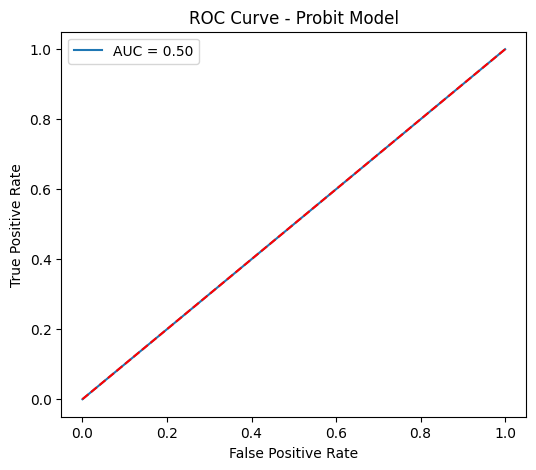

In [ ]:
fpr, tpr, thresholds = roc_curve(y, df['pred_prob'])
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--',color='red')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Probit Model"); plt.legend(); plt.show()